In [64]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt

In [65]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['flower'] = iris.target

In [66]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [67]:
df.drop(['sepal length (cm)', 'sepal width (cm)', 'flower'], axis='columns', inplace=True)
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [68]:
km = KMeans(n_clusters=3)
yp = km.fit_predict(df)
df['cluster'] = yp

In [69]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

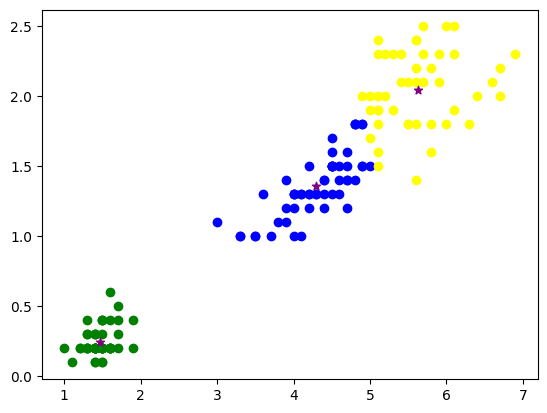

In [70]:
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='green')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

In [71]:
km.inertia_

31.412885668276978

In [72]:
sse = []
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)
sse

[650.4686666666665,
 185.8756625074272,
 31.412885668276978,
 22.175307806324117,
 14.215412450294806,
 12.844533902939165,
 9.603134057971015,
 9.386634284016637,
 7.595951051872105]

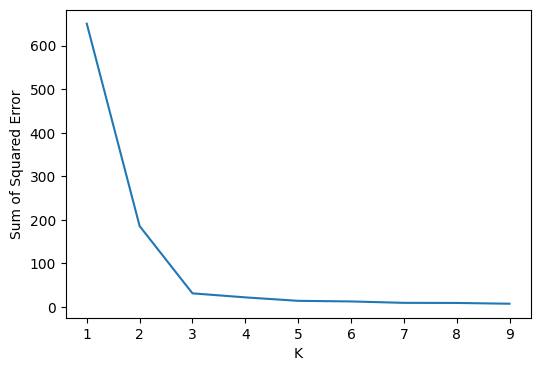

In [73]:
plt.figure(figsize=(6,4))
plt.plot(k_rng, sse)
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.show()